## **Zadanie 7 - Bayesian Network**

Cel zadania polega na skonstruowaniu sieci Bayesowskiej oraz zbadaniu wpływu informacji o statusie w MS Teams na prawdopodobieństwo świecenia się światła w pokoju doktorantki K.

**Scenariusz**
Doktorantka K. (zgodność inicjału imienia całkowicie przypadkowa...) spędza 40% czasu pracy w swoim pokoju na uczelni. Pozostałe 60% czasu pracuje zdalnie. Kiedy K. jest w swoim pokoju, połowę czasu ma wyłączone światło (kiedy próbuje ukryć się przed studentami i pracować nad doktoratem). Gdy nie ma jej w pokoju, zostawia włączone światło tylko w 5% przypadków. W 80% czasu, gdy jest w swoim biurze, K. jest zalogowana w MS Teams. Ponieważ czasami loguje się do Teamsów z domu, w 5% przypadków, gdy nie ma jej na uczelni, nadal jest zalogowana w MS Teams.

**Kroki do wykonania:**
1. Skonstruuj sieć Bayesowską, aby przedstawić opisany scenariusz.
2. Załóżmy, że student sprawdza status K. w MS Teams i widzi, że jest ona zalogowana. Jaki wpływ ma to na przekonanie studenta, że światło w pokoju K. jest włączone?

**Uwagi:**
- Do implementacji można użyć np. biblioteki [pgmpy](https://pgmpy.org).

**Źródło:**

Powyższe zadanie jest parafrazą problemu nr 3, rozdz. 2 z książki Bayesian Artificial Intelligence autorstwa Kevina B. Korba i Ann E. Nicholson, CRC press, 2010.

In [167]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [168]:
model = BayesianNetwork([("office", "teams"), ("office", "light")])

In [169]:
cpd_office = TabularCPD(variable="office", variable_card=2, values=[[0.6], [0.4]])
cpd_light = TabularCPD(variable="light", variable_card=2, values=[[0.95, 0.5], [0.05, 0.5]], evidence=["office"], evidence_card=[2])
cpd_teams = TabularCPD(variable="teams", variable_card=2, evidence=["office"], evidence_card=[2], values=[[0.95, 0.2], [0.05, 0.8]])

In [170]:
print(cpd_office)

+-----------+-----+
| office(0) | 0.6 |
+-----------+-----+
| office(1) | 0.4 |
+-----------+-----+


In [171]:
print(cpd_light)

+----------+-----------+-----------+
| office   | office(0) | office(1) |
+----------+-----------+-----------+
| light(0) | 0.95      | 0.5       |
+----------+-----------+-----------+
| light(1) | 0.05      | 0.5       |
+----------+-----------+-----------+


In [172]:
print(cpd_teams)

+----------+-----------+-----------+
| office   | office(0) | office(1) |
+----------+-----------+-----------+
| teams(0) | 0.95      | 0.2       |
+----------+-----------+-----------+
| teams(1) | 0.05      | 0.8       |
+----------+-----------+-----------+


In [173]:
model.add_cpds(cpd_office, cpd_light, cpd_teams)

In [174]:
model.get_cpds()

[<TabularCPD representing P(office:2) at 0x21615bbcb90>,
 <TabularCPD representing P(light:2 | office:2) at 0x21615bbe550>,
 <TabularCPD representing P(teams:2 | office:2) at 0x21615bbd850>]

In [175]:
model.check_model()

True

In [176]:
model.get_independencies()

(teams ⟂ light | office)
(light ⟂ teams | office)

In [177]:
G = nx.DiGraph()

G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())

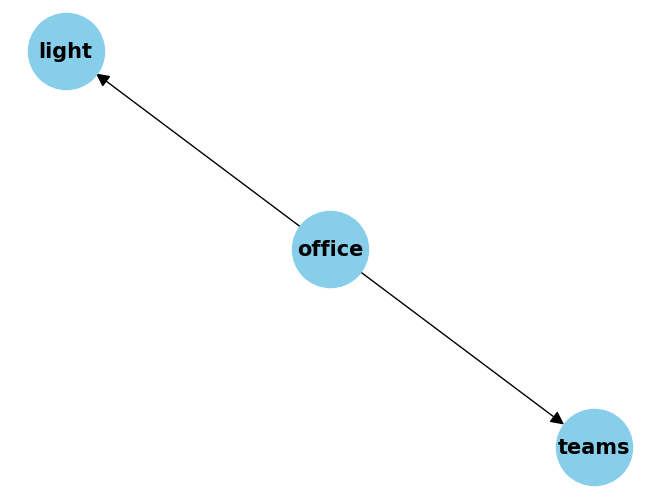

In [182]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold', arrowsize=20)
# plt.title("Sieć Bayesowska")
plt.show()

In [183]:
inference = VariableElimination(model)

In [184]:
q = inference.query(variables=["teams"])
print(q)

+----------+--------------+
| teams    |   phi(teams) |
+==========+==============+
| teams(0) |       0.6500 |
+----------+--------------+
| teams(1) |       0.3500 |
+----------+--------------+


In [185]:
q = inference.query(variables=["teams"], evidence={"light": 0})
print(q)

+----------+--------------+
| teams    |   phi(teams) |
+==========+==============+
| teams(0) |       0.7552 |
+----------+--------------+
| teams(1) |       0.2448 |
+----------+--------------+


In [186]:
q = inference.query(variables=["teams"], evidence={"light": 1})
print(q)

+----------+--------------+
| teams    |   phi(teams) |
+==========+==============+
| teams(0) |       0.2978 |
+----------+--------------+
| teams(1) |       0.7022 |
+----------+--------------+
